# Libraries

In [19]:
import keras
from keras.models import Sequential
from keras import layers
from keras.utils import np_utils
from keras.datasets import cifar10

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import numpy as np
import seaborn as sns

# Dataset

Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

// Copied from https://keras.io/api/datasets/cifar10/ 

## Import Dataset

In [4]:
# Import the dataset as shown on it's own web page
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() # X_test as test_images; X_train as train_images; y_test as test_labels; y_train as train_labels

## First Glance

In [5]:
# Check if any data is missing (w/comparing the sizes told in the keras web page) by checking the dimensions an their sizes
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# As seen here, both train and test "labels" are consists of integer numbers 0 to 9 inclusive
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Also, in the keras web page the data is taken from, classes are shown as follows (0 - airplane; 1 - automobile; 2 - bird etc.)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Visualization

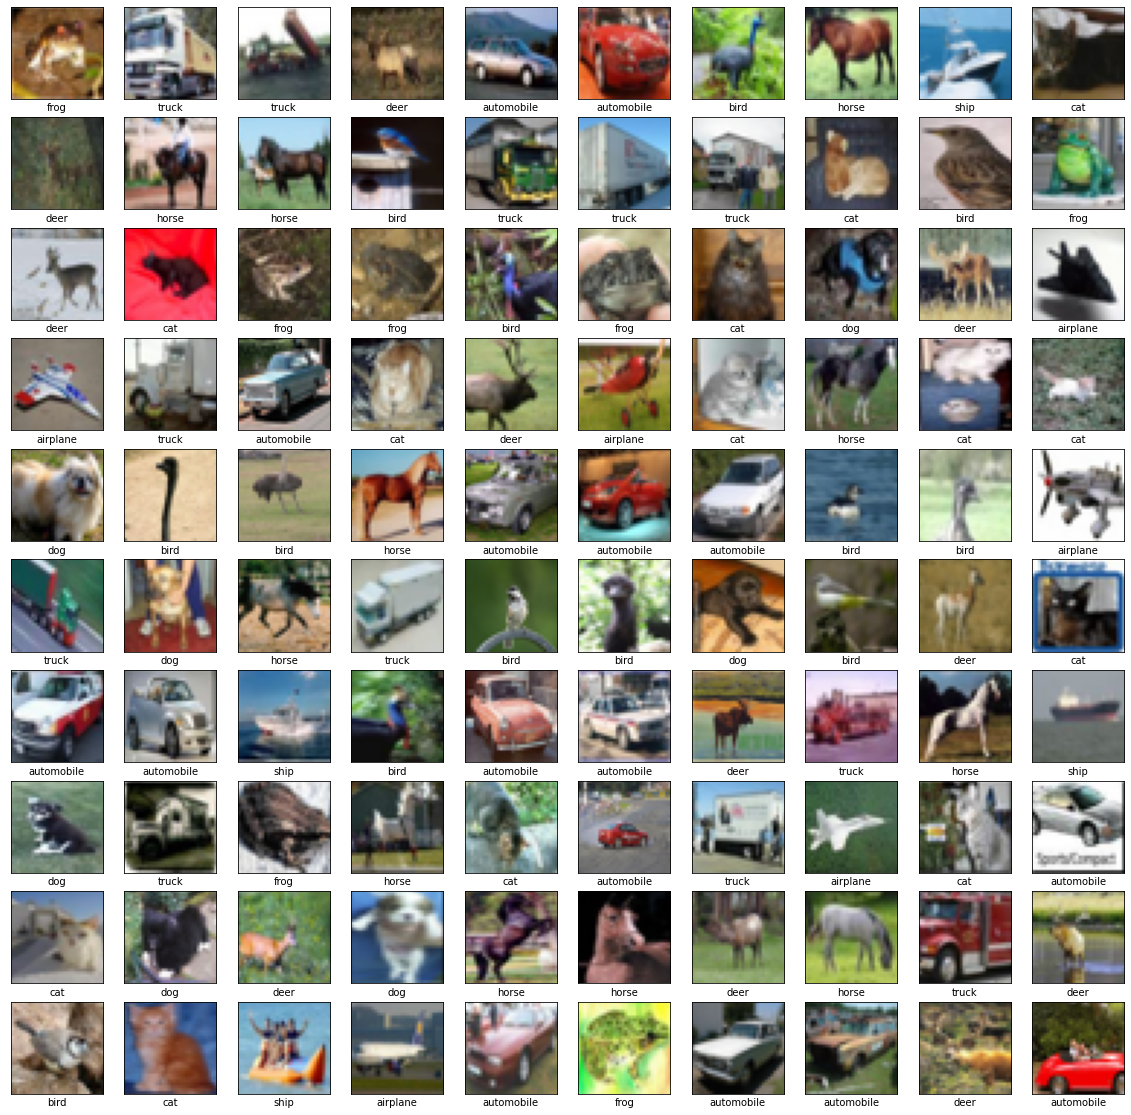

In [8]:
# Visualizing the dataset to understand better what to do
plt.figure(figsize=[20, 20])
for i in range (100):
  plt.subplot(10, 10, i+1) # 10 * 10 different images
  plt.xticks([])
  plt.yticks([])  
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(classes[train_labels[i][0]])

plt.show()

## Prep Data

In [9]:
# We have to convert it to float 32 or float 64, otherwise the type will be mismatched (UFuncTypeError)
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
 
# In order to scale (normalize) the values, all of the lists are divided into 255 which is the maximum value that an image can possibly has
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels) # in order to successfully use categorical_crossentropy as the loss function
train_labels = np_utils.to_categorical(train_labels, len(classes))
test_labels = np_utils.to_categorical(test_labels, len(classes))

# Model

## Init

In [10]:
model = Sequential() # declare the model

# Feature Learning Parts
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape=(32,32,3))) # started with "32" because of the image size is 32*32
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# Classification Parts
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation = "softmax")) # softmax instead of relu because we need the probabilities, and binary (like "0-1" such as relu) is useless here

# Checking the model in a structured way, can also be visualized with tensorboard
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

## Compile

In [11]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

## Fit

In [18]:
# in order to train fast, epochs is selected as 10; increasing it will decrease the loss and also increase the accuracy (not always but at the elbow* point) (elbow point: the optimum point of the model)
# of course also has to be set considering the possibility of over-fitting
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 122s 155ms/step - loss: 0.5985 - accuracy: 0.7953 - val_loss: 0.6662 - val_accuracy: 0.7718
Epoch 2/10
782/782 [==============================] - 129s 165ms/step - loss: 0.5890 - accuracy: 0.8010 - val_loss: 0.5725 - val_accuracy: 0.7977
Epoch 3/10
782/782 [==============================] - 131s 167ms/step - loss: 0.5797 - accuracy: 0.8005 - val_loss: 0.6683 - val_accuracy: 0.7703
Epoch 4/10
782/782 [==============================] - 125s 160ms/step - loss: 0.5728 - accuracy: 0.8027 - val_loss: 0.5584 - val_accuracy: 0.8070
Epoch 5/10
782/782 [==============================] - 125s 159ms/step - loss: 0.5660 - accuracy: 0.8070 - val_loss: 0.5899 - val_accuracy: 0.8013
Epoch 6/10
782/782 [==============================] - 129s 166ms/step - loss: 0.5550 - accuracy: 0.8096 - val_loss: 0.5795 - val_accuracy: 0.8056
Epoch 7/10
782/782 [==============================] - 121s 154ms/step - loss: 0.5430 - accuracy: 0.8152 - val_loss: 0.5743 -

## Evaluate

Text(0.5, 1.0, 'Loss Curves')

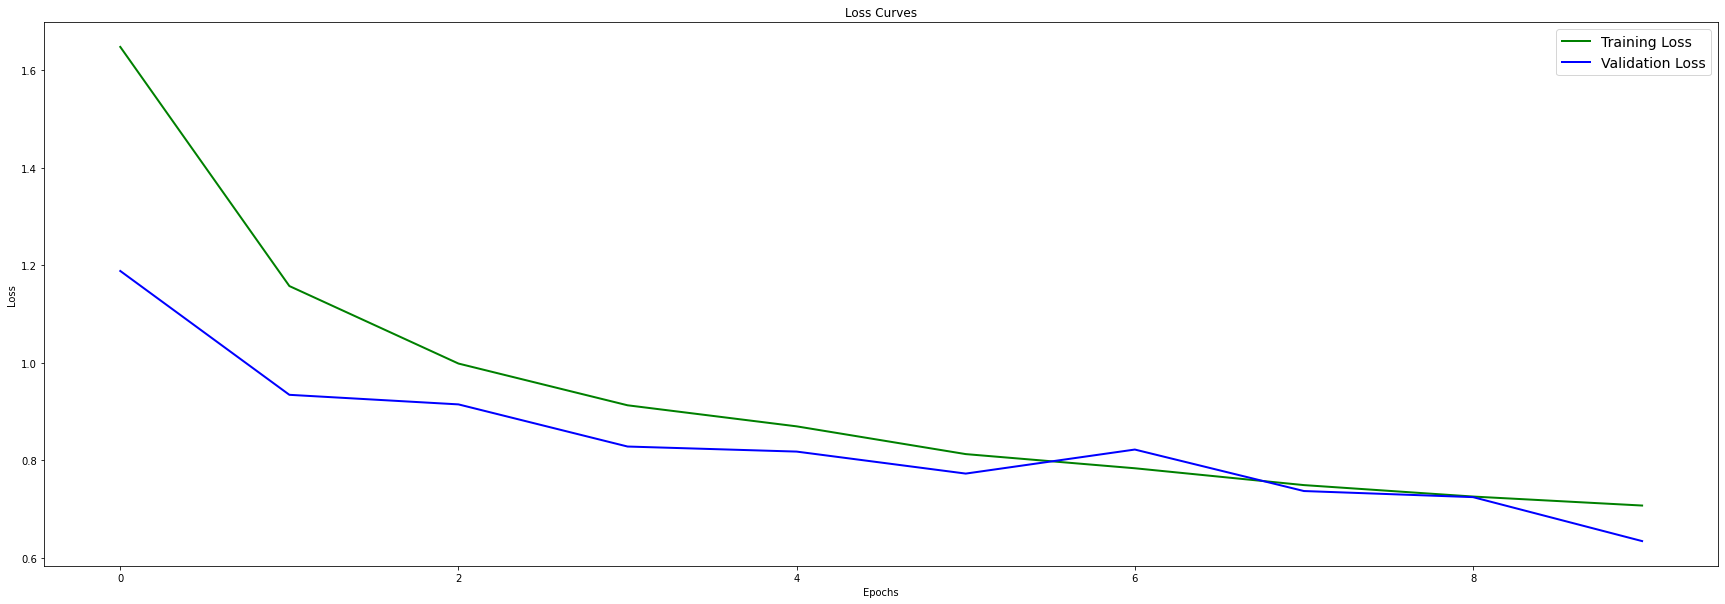

In [13]:
# Loss curve
plt.figure(figsize = [30,10])
plt.plot(history.history["loss"], "g", linewidth = 2.0)
plt.plot(history.history["val_loss"], "b", linewidth = 2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Loss", fontsize = 10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

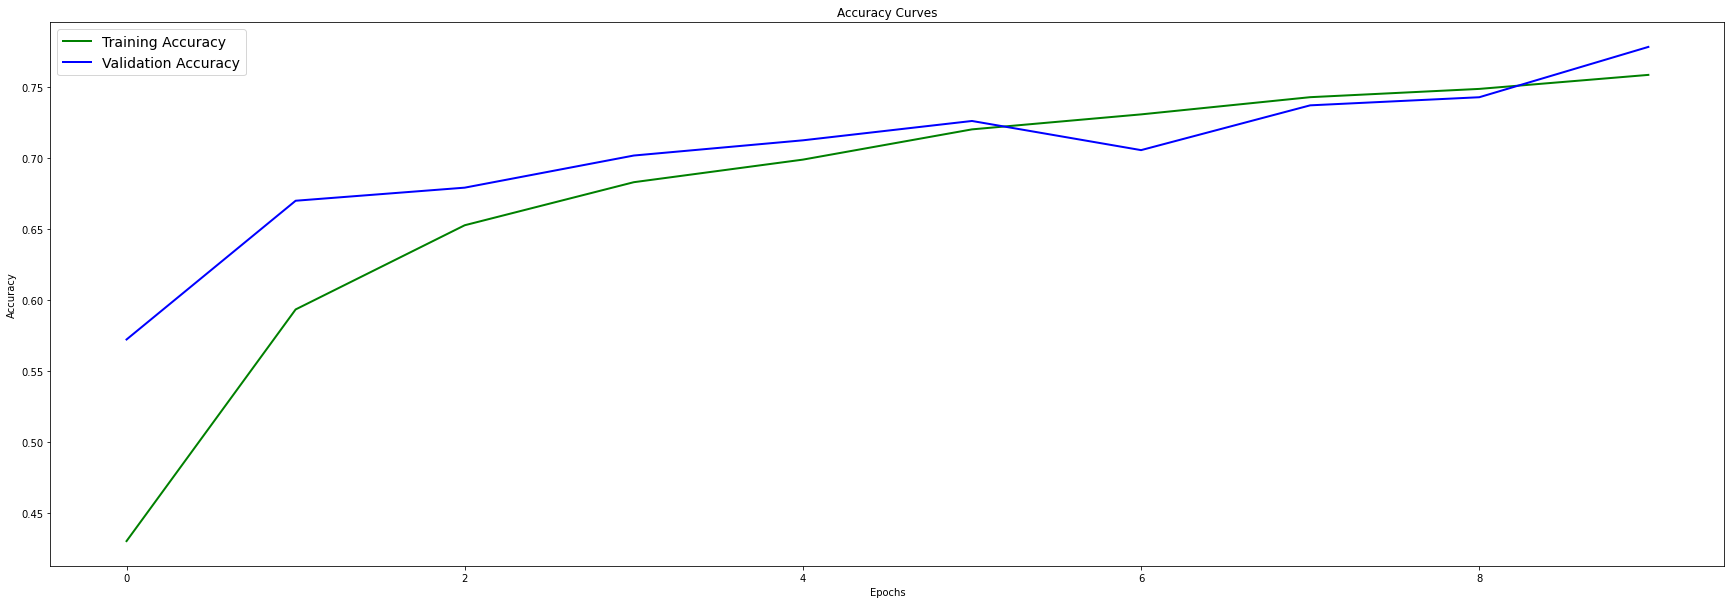

In [14]:
# Accuracy curve
plt.figure(figsize = [30,10])
plt.plot(history.history["accuracy"], "g", linewidth = 2.0)
plt.plot(history.history["val_accuracy"], "b", linewidth = 2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize = 14)
plt.xlabel("Epochs", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10)
plt.title("Accuracy Curves", fontsize = 12)

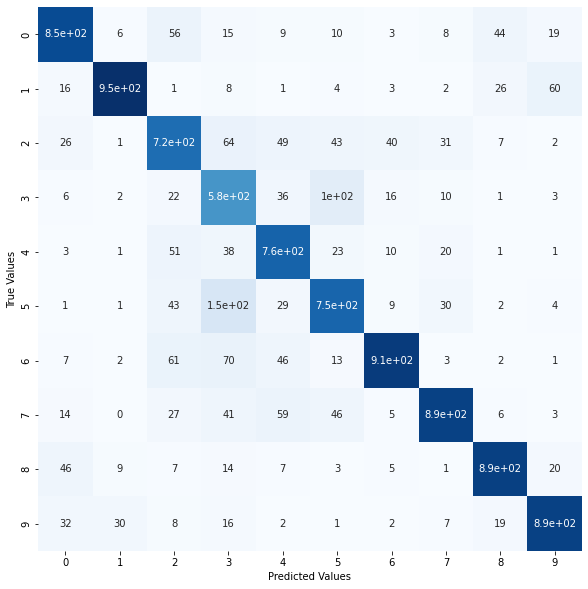

In [20]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

## Prediction

In [15]:
# Predict 
pred = model.predict(test_images)
print(pred)

# Turn predictions into indexes
pred_classes = np.argmax(pred, axis = 1)
print(pred_classes)

[[1.57086691e-03 1.17661303e-03 2.86246836e-03 ... 9.37677454e-04
  7.71668600e-03 2.10732711e-03]
 [9.52785555e-03 3.68548650e-03 1.30429953e-05 ... 1.07569508e-06
  9.86537576e-01 2.19517169e-04]
 [4.70127352e-03 6.26948616e-03 9.53536728e-05 ... 4.67802602e-05
  9.86097276e-01 2.47985567e-03]
 ...
 [1.02490612e-05 3.31285560e-06 2.19859788e-03 ... 2.18477082e-02
  7.04444528e-06 1.16384435e-05]
 [6.67704269e-02 8.81300926e-01 3.16065922e-03 ... 2.33281311e-03
  4.33286466e-03 1.01793194e-02]
 [5.25352505e-07 7.83718224e-06 4.61335112e-05 ... 9.98073220e-01
  1.15445573e-07 1.67001269e-06]]
[3 8 8 ... 5 1 7]


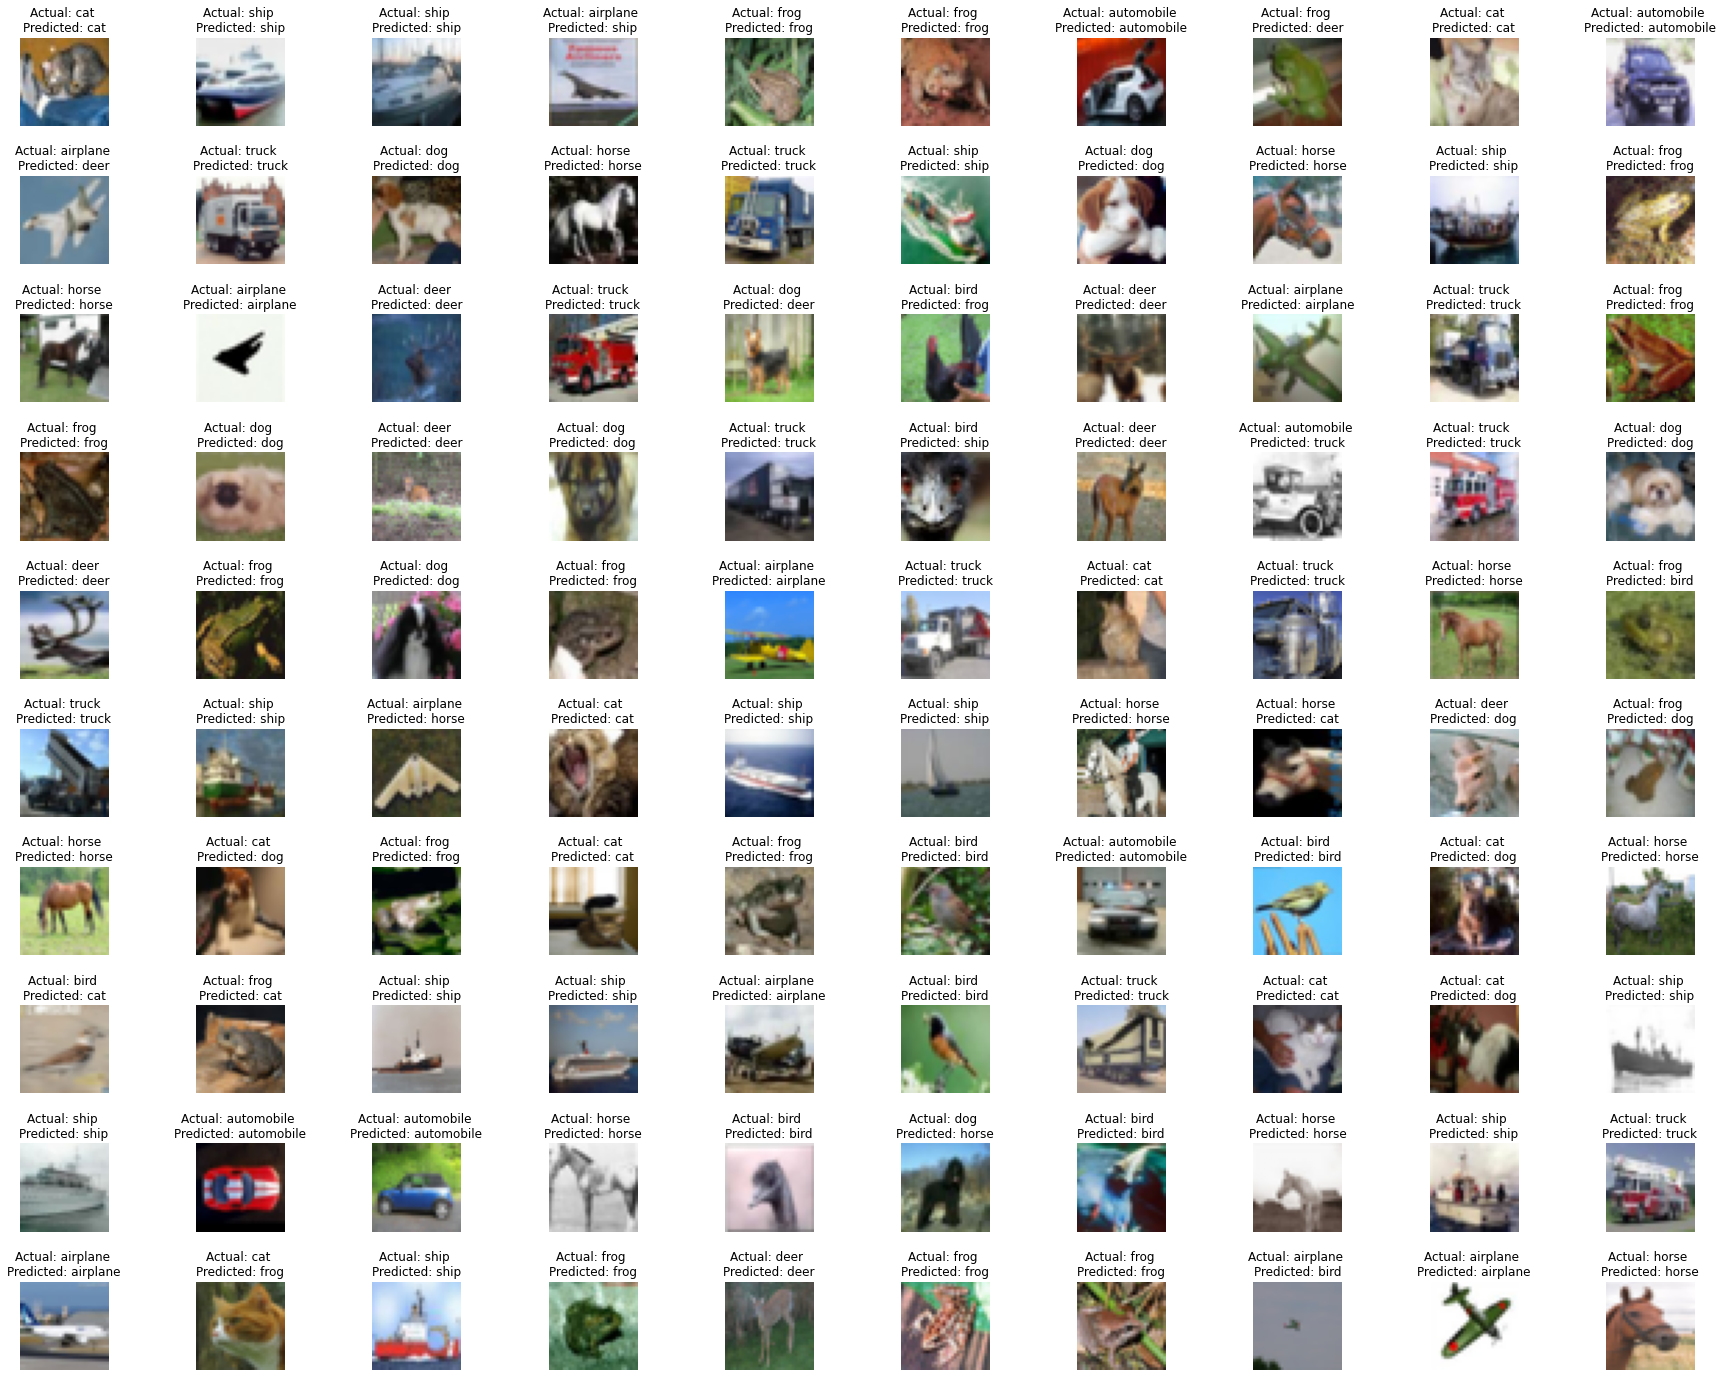

In [16]:
# Actual and Predicted visualization

fig, axes = plt.subplots(10, 10, figsize=(30,25))
axes = axes.ravel()

for i in np.arange(0, 100):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Actual: %s \nPredicted: %s" % (classes[np.argmax(test_labels[i])], classes[pred_classes[i]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=1)